## Importo las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datos_practica_1.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Aparentemente, hubo un error al momento de descargar el csv, pues existe una columna desconocida llamada Unname: 32 con valores NaN (not a number). Ante esto, procedemos a borrar dicha columna

In [4]:
df = df.drop('Unnamed: 32', axis = 1)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Una pregunta básica antes de analizar un conjunto de datos es, ¿Qué forma tiene nuestra tabla o dataset? ¿Qué estadísticos básicos puedo obtener por variable?

In [6]:
# Dimensiones del dataset
print("Shape:", df.shape)

# Tipos de datos y nulos
print(df.info())

# Estadísticas descriptivas
print(df.describe())

Shape: (569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

Veo la cantidad de observaciones que hay por cada clase:

In [7]:
target_counts = df['diagnosis'].value_counts()
target_counts

diagnosis
B    357
M    212
Name: count, dtype: int64

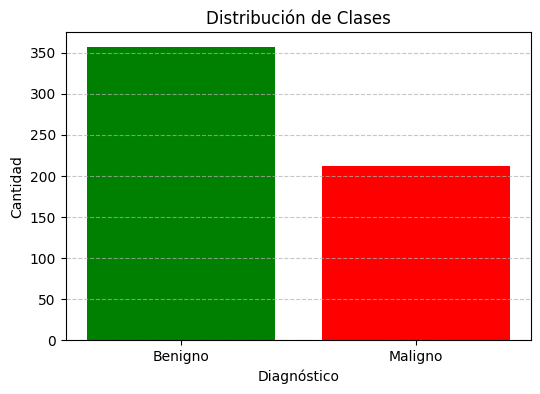

In [8]:
# Conteo de clases
labels = ['Benigno', 'Maligno']

# Gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(labels, target_counts, color=['green', 'red'])
plt.title('Distribución de Clases')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

¿Existirá alguna diferencia entre tumores benignos y malignos? Veamos.

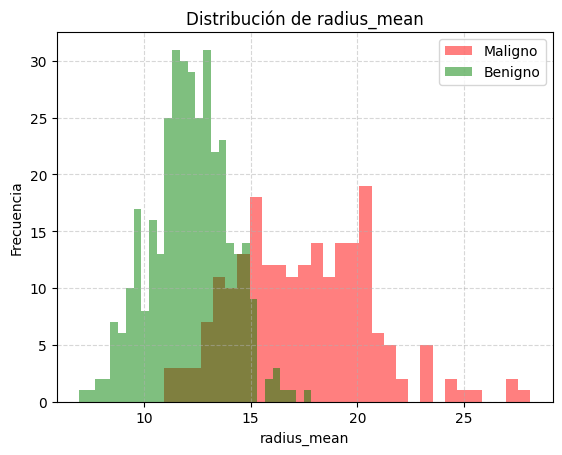

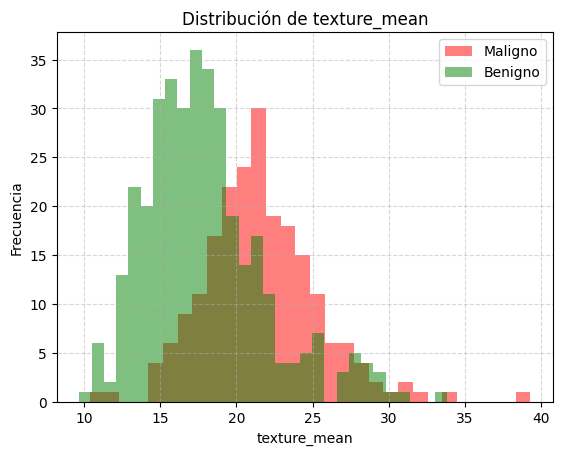

In [9]:
features = ['radius_mean', 'texture_mean']

for feature in features:
    plt.hist(df[df['diagnosis'] == 'M'][feature],alpha=0.5, color='red', label='Maligno', bins=30)
    plt.hist(df[df['diagnosis'] == 'B'][feature],alpha=0.5, color='green', label='Benigno', bins=30)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [10]:
df.corr

<bound method DataFrame.corr of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

Comparemos ahora pares de variables. ¿Habrá un par que tenga correlación alta?

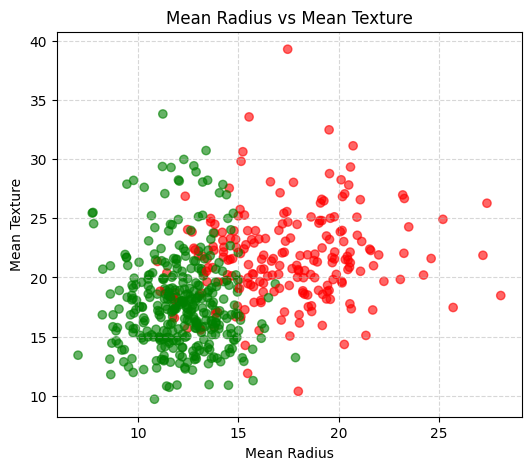

In [11]:
colors = df['diagnosis'].map({'M': 'red', 'B': 'green'})  

plt.figure(figsize=(6, 5))
plt.scatter(df['radius_mean'], df['texture_mean'], c=colors, alpha=0.6)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Mean Radius vs Mean Texture')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

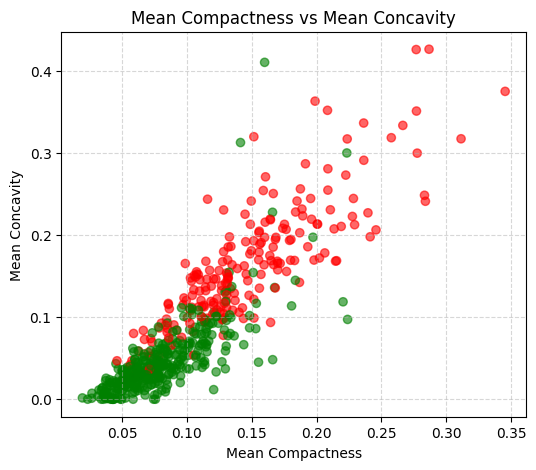

In [12]:
plt.figure(figsize=(6, 5))
plt.scatter(df['compactness_mean'], df['concavity_mean'], c=colors, alpha=0.6)
plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concavity')
plt.title('Mean Compactness vs Mean Concavity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Aparentemente, este par de variables tiene un alto coeficiente de correlación. Procedemos a obtener el coeficiente de correlación de pearson.

In [13]:
from scipy.stats import pearsonr

In [14]:
pearsonr(df['compactness_mean'], df['concavity_mean'])

PearsonRResult(statistic=0.8831206701772509, pvalue=1.6230020517294313e-188)

El coeficiente de correlación es bastante alto, aproximadamente de 0.88. Esto nos indica que tenemos evidencia para pensar que ambas variables están correlacionadas. Veamos ahora si existen datos atípicos en otras variables.

In [15]:
df_benigno = df[df['diagnosis'] == 'B']
df_maligno = df[df['diagnosis'] == 'M']

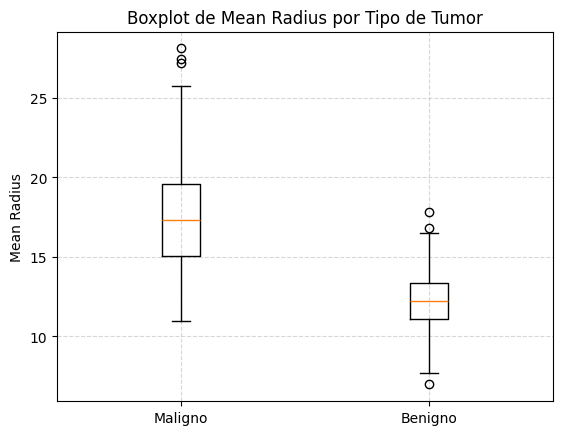

In [16]:
plt.boxplot([df_maligno['radius_mean'], df_benigno['radius_mean']], labels=['Maligno', 'Benigno'])
plt.title('Boxplot de Mean Radius por Tipo de Tumor')
plt.ylabel('Mean Radius')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()